In [7]:
from langgraph.graph import StateGraph,START, END
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI 
from dotenv import load_dotenv
from typing import TypedDict

In [5]:
load_dotenv()  # Load environment variables from .env file
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0.7)

In [8]:
class reportstate(TypedDict):
    topic : str
    outline : str
    report : str
    category : str 

In [10]:
# Creating outline function
def create_outline(state : reportstate) -> reportstate:
    topic = state["topic"]
    prompt = PromptTemplate(
        input_varaibles = ["topic"],
        template = "Create a detailed outline for a report on the topic: {topic}"
    )
    outline = llm.invoke(prompt.format(topic=topic)).content
    state["outline"] = outline
    return state

#creating report function
def create_report(state : reportstate) -> reportstate:
    outline  = state["outline"]
    prompt = PromptTemplate(
        input_varaibles = ["outline"],
        template = "Write a comprehensive report based on the following outline: {outline}"
    )
    report = llm.invoke(prompt.format(outline=outline)).content
    state["report"] = report
    return state

#creating categorize function
def categorize_report(state : reportstate) -> reportstate:
    report = state["report"]
    prompt = PromptTemplate(
        input_varaibles = ["report"],
        template = "Categorize the following report into one of these categories: " \
        "Technology, Health, Finance, Education, Environment. Report: {report}"
    )
    category = llm.invoke(prompt.format(report=report)).content
    state["category"] = category
    return state


In [36]:
graph = StateGraph(reportstate)
graph.add_node('generate outline',create_outline)
graph.add_node('generate report',create_report)
graph.add_node('categorize report',categorize_report)
graph.add_edge(START,'generate outline')
graph.add_edge('generate outline','generate report')
graph.add_edge('generate report','categorize report')
graph.add_edge('categorize report',END)

wokflow = graph.compile()

In [15]:
initial_state = {'topic' : 'The Impact of Artificial Intelligence on Modern Healthcare'}
final_state = wokflow.invoke(initial_state)

In [ ]:
print("Final outline :", final_state['outline'])
print("Final Report :", final_state['report'])
print("Report Category :", final_state['category'])

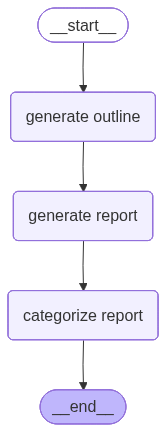

In [38]:
from IPython.display import Image
Image(wokflow.get_graph().draw_mermaid_png())